In [70]:
import re
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from numpy.linalg import norm
from scipy import optimize
import scipy.stats as sts
import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Вычислить сходство предложений

In [33]:
#Словарь слов
def linesToWordsDict(lines,delimiter):
    words = dict()    
    for line in lines:
        for word in filter(None,re.split(delimiter,line)):
            if word not in words:
                words[word] = 0 # or 1
            else:
                words[word] += 1 
    return words

#Матрица вхождений слов
def linesToMatrix(lines,words,delimiter):
    linesCount = len(lines)
    wordsCount = len(words)
    matrix = np.zeros((linesCount,wordsCount))
    for i in range(0,linesCount,1):
        lineWords = list(filter(None,re.split(delimiter,lines[i])))
        for j in range(0,wordsCount,1):
            dictWord = list(words.keys())[j]
            for lineWord in lineWords:
                if (dictWord == lineWord):
                    matrix[i][j] +=1 
    return matrix

#Найти схожие предложения
def matchSentence (sentenceNum, matrix, n):
    cos_values = []
    out = []    
    for row in range(0,len(matrix),1):
        cos_values.append(cosine(matrix[sentenceNum],matrix[row]))
    for i in range(0,n,1):        
        val = min(cos_values)
        #ind = cos_values.ind(val)
        cos_values.remove(val)
        out.append(val)
    return out   

In [34]:
file = open('sentences.txt','r')
lines = file.readlines()
lines = list(map(lambda x : x.lower(),lines))
words = linesToWordsDict(lines,'[^a-z]')
matrix = linesToMatrix(lines,words,'[^a-z]')
result = matchSentence(0,matrix,3)

print (result)

[0.0, 0.7327387580875756, 0.77708871496985887]


## Обработка выборки

In [72]:
#Чтение
frame = pd.read_csv('dataset.tsv', header=0, sep='\t')

#Применить функцию к столбцу
frame.Birth = frame.Birth.apply(pd.to_datetime)

#Заполнить nulls
frame = frame.fillna('Кто то')

#Запись
#frame.to_csv('updated_dataset.csv', sep=',', header=True, index=False)

#Выборка по условию
frame[(frame.Birth >= pd.datetime(1985,1,1)) &
      (frame.City == 'Москва')]

#Первые несколько записей
frame.head(5)

#Группировка
#group = frame.groupby('City')['City'].agg(lambda x : float(len(x))/frame.shape[0])
group = frame.groupby('City')['City'].count()

#График
plt.figure(figsize(8,6))
group.plot(kind='bar')
plt.xticks(rotation=0)

In [87]:
#Добавить поле
frame['y'] = pd.Series(np.random.rand(len(frame)))
#del frame['y']

#Средние
means = sm.CompareMeans(sm.DescrStatsW(frame[frame['City'] == 'Москва']['y']),
                        sm.DescrStatsW(frame[frame['City'] != 'Москва']['y']))

#Различия между средними
print(means.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1])

#Доверительный интервал
print(means.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled'))

0.43888087435
(-0.61200448832395105, 0.32284754656328241)


## Вектора

##### Норма L1 =     $\left\Vert x \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} \right|.$
##### Норма L2 =     $\left\Vert x \right\Vert_{2} = \sqrt{\sum_{i=1}^n \left( x_{i} \right)^2}.$
##### Расстояние L1 =     $\rho_{1}\left( x, y \right) = \left\Vert x - y \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} - y_{i} \right|$
##### Расстояние L2 =   $ \rho_{2}\left( x, y \right) = \left\Vert x - y \right\Vert_{2} = 
 \sqrt{\sum_{i=1}^n \left( x_{i} - y_{i} \right)^2}.$
 ##### Скалярное произведение =   $ \langle x, y \rangle = \sum_{i=1}^n x_{i} y_{i}.$
 ##### Косинусное расстояние $\langle x, y \rangle = \left| x \right| | y | \cos(\alpha)\implies \cos(\alpha) = \frac{\langle x, y \rangle}{\left| x \right| | y |},$

In [92]:
#Массивы \ Вектора
sampleArray = np.array([1,2,3,4,5],dtype=int)
sampleArray2 = np.array([1,1,2,2,3],dtype=int)
sampleInterval = np.arange(start=0,stop=10,step=1)

#Норма вектора
norm(sampleArray,ord=1)

#Расстояние между векторами
norm(sampleArray-sampleArray2,ord=2)

#Скалярное произведение
np.dot(sampleArray, sampleArray2)

#Косинус между векторами
cos = np.dot(sampleArray, sampleArray2) / norm(sampleArray) /norm(sampleArray2)

#Расстояние c преобразованием (можно вычислять попарные расстояния между матрицами)
#from scipy.spatial.distance import cdist
#sampleArray = sampleArray.reshape((1,5))
#sampleArray2 = sampleArray2.reshape((1,5))
#print(cdist(sampleArray,sampleArray2,metric='euclidean'))

## Матрицы

In [93]:
#Матрица
mat = np.array([[1,2,3],[4,5,6],[7,8,9]])

#Транспонирование
matT = mat.T

#Обращение
matI = np.linalg.inv(mat)

#Определитель
det = np.linalg.det(mat)

#Ранг
rank = np.linalg.matrix_rank(mat)

#Собственное числа и вектора
num,vec = np.linalg.eig(mat)

## СЛАУ Ax=b

In [31]:
a = np.array([[1, 1, 6], [2, 5, 11],[3,7,14]])
b = np.array([9, 8, 7])
x = np.linalg.solve(a, b)
px, pres, pr, ps = np.linalg.lstsq(a, b)

print ("Матрица показателей A:\n", a)
print ("Вектор результатов b:\n", b)
print ("Вектор коэффициентов w = Решение системы:\n", x)
print ("Псевдо решение системы:\n", px)

#Проверка
#print (np.dot(a,x))

Матрица показателей A:
 [[ 1  1  6]
 [ 2  5 11]
 [ 3  7 14]]
Вектор результатов b:
 [9 8 7]
Вектор коэффициентов w = Решение системы:
 [-3.5 -2.5  2.5]
Псевдо решение системы:
 [-3.5 -2.5  2.5]


## Оптимизация

In [39]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
    
print (f([1, 1]))

0.0


In [46]:
#Оптимизация функции
#print ('Перебор ',optimize.brute(f, ((-5, 5), (-5, 5))))
#print ('\nЭволюция ',optimize.differential_evolution(f, ((-5, 5), (-5, 5))))
#print ('\nBFGS  ',optimize.minimize(f, [2, 2], method='BFGS'))
#print ('\nНелдер-Мид  ',optimize.minimize(f, [2, 2], method='Nelder-Mead'))

## Вероятность

#### Произведение (независимые, оба произошли): $p(ab) =  p(a) * p(b)$
#### Сумма ( несовместные, хоть 1 произошло): $p(a+b) =  p(a) + p(b)$
#### Сумма (совместные, хоть 1 произошло: $p(a+b) =  p(a) + p(b) - p(ab)$

#### Условная вероятность: $p(a|b) = p(ab)/p(b)$
#### Полная вероятность: $p(a) =  p(a|b)*p(b) + p(a|!b)*p(b!)$

### Формула Байеса: $P(B|E) = P(B) * P(E|B)  /  P(E)$
B - Убеждение
Е - Свидетельства

Правильность убеждений с учетом новых свидетельсв = 
Правильность убеждений * Правильность свидетельств в случае правильности убеждений / Правильность свидетельств

Пример:
Вероятность болезни при положительном тесте = вероятность болезни * вероятность положительного теста при болезни / вероятность положительного теста. 

#### Мат. ожидание 
Cреднее арифметическое, EX
#### Медиана 
центральный элемент вариационного ряда,квантиль 0.5 , квантиль =  p (X < Xa) >= a, p (X > Xa) >= 1-a
#### Мода 
самое вероятное значение (максимум)

#### Дисперсия
Разброс = E ((X - EX)^2), Среднеквадратичное отклонение, SIG = sqrt(DX)

#### Доверительный интервал
$ P(Cl <= Tet <= Cu) >= 1 - alpha$
Tet = оцениваемый параметр
1 - alpha = уровень доверия
C - границы, задаются через нормальное распределение = Pn = N (EX, DX/n)
Pn - выборочное среднее, прим. мат. ожидание
Пример: P (EX - 2*SIG <= p <= EX + 2*SIG) = 0.95

### Центральная предельная теорема
$Xn = N (EX, DX/n)$
Распределение выборочных средних можно описать нормальным распределением.

#### Биноминальная величина :
$p(x=k) =  C * p^k (1-p)^(n-k),    C = n!/(k! * (n-k)!)$
n попыток, k попаданий, Баскетбольные броски

#### Пуассоновская величина : 
$p(x=k) = lambda^k * e ^ -lambda / k!$
Счётчик, k вхождений, количество слов в тексте

#### Бернуллиевская величина : 
$p(x=1) =  p, p(x=0)=1-p$
2 исхода, Монетка

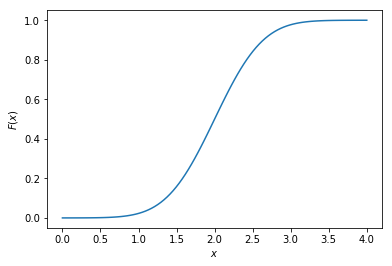

In [56]:
#Нормальное распределение, sigma - среднекв. откл., mu- мат. ожидание
mu = 2.0
sigma = 0.5
norm_rv = sts.norm(loc=mu, scale=sigma)


x = np.linspace(0,4,100)
y = norm_rv.cdf(x) # функция распределения, вероятность что X примет значение <=x
#y = norm_rv.pdf(x) # плотность вероятности
#y = norm_rv.rvs(size=100)# сгенерировать несколько значений

plt.plot(x,y)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')